In [7]:
import math
from logging import debug

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import copy
from math import sqrt,ceil

from PIL.ImageColor import colormap
from scipy.stats import linregress
import libraries as lib
import re

In [3]:
#20240713_Huy-Limburg/0026 - 20240713T080342 14h37m16s 145.044km Durnal - Heel
#Configuratie: 
#Roze roer 
#Motortype: 30100/13 (NR 6) 
#@i=7 (NR E) 
#Schakeling: Driehoek 
#Schroef: Incapa Blad 300 N, 15 
#Piloot: 
#Teun van den Elzen (72kg) (11:0
#Tristan Ploeger (80kg) (13:30-2
#Tomas Kramer (70kg) (20:00- 

#20240709_Anse_stroomafwaarts/0002 - 20240709T070429 8h16m21s 51.701km Trevoux - Givors
#Configuratie: 
#Roze roer 
#Motortype: 30100/13 (NR 6) 
#@i=7 (NR E) 
#Schakeling: Driehoek 
#Schroef: Schroef Fee (Chopped Tips) 
#Folder: 
#Folders zijn weer begonnen vanaf mapje 1 vanwege het vervangen van de sd-kaart. 
#0002: Gaat het water in <--- 
#0003: Na opnieuw opstarten. 
#Piloot: 
#Tristan Ploeger (80kg) 
#Jonathan Meuleman (70kg) 

#20240708_Valence/0231 - 20240708T111346 8h9m54s 47.648km La Voulte-sur-Rhone - Tournon-sur-Rhone
#Configuratie: 
#Roze roer 
#Motortype: 30100/13 (NR 6) 
#@i=7 (NR E) 
#Schakeling: Driehoek 
#Schroef: Schroef Fee (Chopped Tips) 
#Piloot: 
#Ruben Jans (77kg) 
#Bastiaan Buurman (75kg) 

#20240714_Limburg-Nijmegen\0028 - 20240714T061924 15h2m29s 148.594km Bunde - Lent
#Configuratie: 
#Roze roer 
#Motortype: 30100/13 (NR 6) 
#@i=7 (NR E) 
#Schakeling: Driehoek 
#Schroef: Incapa Blad 300 N, 15 m/s 
#Piloot: 
#Felix van Beusekom (78kg) (10:20-14:40) 
#Dennis van den Berg (73kg) (14:40-~17:30) 
#Jonathan Gessel (76kg) (~17:30-21:20) 

In [4]:
directory1 = "../../OneDrive - HvA/Logfiles/SOLAR/2024/20240707_20240715_terugvaart/20240713_Huy-Limburg/0026 - 20240713T080342 14h37m16s 145.044km Durnal - Heel"
directory2 = '../../OneDrive - HvA/Logfiles/SOLAR/2024/20240707_20240715_terugvaart/20240714_Limburg-Nijmegen/0028 - 20240714T061924 15h2m29s 148.594km Bunde - Lent'
directory3 = '../../OneDrive - HvA/Logfiles/SOLAR/2024/20240707_20240715_terugvaart/20240708_Valence/0231 - 20240708T111346 8h9m54s 47.648km La Voulte-sur-Rhone - Tournon-sur-Rhone'
directory4 = '../../OneDrive - HvA/Logfiles/SOLAR/2024/20240707_20240715_terugvaart/20240709_Anse_stroomafwaarts/0002 - 20240709T070429 8h16m21s 51.701km Trevoux - Givors'

result1 = lib.DataUitzoekenGui(directory1)
result2 = lib.DataUitzoekenGui(directory2)
result3 = lib.DataUitzoekenGui(directory3)
result4 = lib.DataUitzoekenGui(directory4)

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '2_MPPT_0_05_05.csv', '3_MPPT_1_05_07.csv', '4_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '2_MPPT_0_05_05.csv', '3_MPPT_1_05_07.csv', '4_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '2_MPPT_0_05_05.csv', '3_MPPT_1_05_05.csv', '4_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '2_MPPT_0_05_07.csv', '3_MPPT_1_05_07.csv', '4_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

In [181]:
# Na het laden van de bestanden en het klikken op de knop
# Controleer of 'merged_df' in result zit
if 'merged_df' in result1:
    merged_df1 = result1['merged_df'].copy()
    #merged_df2 = result2['merged_df'].copy()
    #merged_df3 = result3['merged_df'].copy()
    #merged_df4 = result4['merged_df'].copy()
    # Gebruik merged_df zoals je wilt
else:
    print("De data is nog niet geladen.")

In [228]:
merged_df1

,1_Datalogger port,"1_Dataloggertijd, in s","1_MPPT-tijd, in s","1_Paneel 1 ingangsspanning, in V","1_Paneel 1 ingangsstroom, in I","1_Paneel 1 instantaan ingangsvermogen, in W","1_Paneel 1 totale ingangsenergie, in J","1_Paneel 2 ingangsspanning, in V","1_Paneel 2 ingangsstroom, in I","1_Paneel 2 instantaan ingangsvermogen, in W",...,"3_Paneel 1 berekend vermogen, in W","3_Paneel 2 berekend vermogen, in W","4_Paneel 1 berekend vermogen, in W","4_Paneel 2 berekend vermogen, in W","5_Paneel 1 berekend vermogen, in W","5_Paneel 2 berekend vermogen, in W",Totale_MPPT_Output_W,Gemiddelde_Irradiance_W_per_m2,Totale_Incident_Power_W,Efficiëntie_perc
Indextijd,,,,,,,,,,,,,,,,,,,,,
0 days 00:02:38,2.0,158.002064,1221.121330,20.636549,1.226931,43.902775,1.455329e+04,21.080186,1.230637,44.984775,...,6.859532,6.156206,7.563065,-0.264424,0.000314,0.002139,123.602797,211.500000,1229.661000,10.051778
0 days 00:02:39,2.0,158.999430,1222.118674,20.638262,1.225893,44.002087,1.457854e+04,21.153000,1.226505,45.123495,...,9.316738,5.918952,4.665423,-0.266024,0.000325,0.002149,123.289116,211.500000,1229.661000,10.026269
0 days 00:02:40,2.0,159.994135,1223.113355,20.718284,1.221588,43.915461,1.460370e+04,21.228520,1.221216,44.983657,...,25.641946,6.335397,4.942248,-0.264114,0.000313,0.002154,140.439726,211.500000,1229.661000,11.421012
0 days 00:02:41,2.0,160.996633,1224.115838,20.561155,1.233204,44.152155,1.462910e+04,21.153942,1.227427,45.217825,...,27.286999,7.020772,5.235437,-0.264207,0.000304,0.002142,143.134119,211.500000,1229.661000,11.640128
0 days 00:02:42,2.0,161.999376,1225.118569,20.635417,1.228534,44.066854,1.465452e+04,21.228010,1.223117,45.136379,...,27.675324,8.108010,4.915812,-0.264030,0.000322,0.002144,144.246940,211.594059,1230.207861,11.725412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 13:31:53,2.0,48713.003298,49775.211980,16.249010,0.036270,1.002910,1.355965e+06,16.448000,0.033640,0.937250,...,0.463979,0.528641,0.695072,0.398335,0.827003,-0.234148,4.721139,1.500000,8.721000,54.135291
0 days 13:31:54,2.0,48714.013697,49776.222443,16.279402,0.036062,0.997588,1.355966e+06,16.480072,0.033639,0.944124,...,0.444041,0.531055,0.686241,0.393521,0.804861,-0.230655,4.645756,1.500000,8.721000,53.270912
0 days 13:31:55,2.0,48715.003023,49777.211980,16.409650,0.035570,0.987790,1.355966e+06,16.642980,0.033290,0.940570,...,0.454527,0.528637,0.695759,0.401734,0.809564,-0.236696,4.676858,1.500000,8.721000,53.627544


In [183]:
# Functie om de spanning- en stroomkolommen te identificeren
def identificeer_paneel_spanning_stroom(df):
    voltage_cols = []
    current_cols = []
    pattern_voltage = r'^\d+_Paneel \d+ ingangsspanning, in V$'
    pattern_current = r'^\d+_Paneel \d+ ingangsstroom, in I$'
    for col in df.columns:
        if re.match(pattern_voltage, col):
            voltage_cols.append(col)
        elif re.match(pattern_current, col):
            current_cols.append(col)
    return voltage_cols, current_cols

# Identificeer de spanning- en stroomkolommen
voltage_cols, current_cols = identificeer_paneel_spanning_stroom(merged_df1)

# Zorg ervoor dat de lijsten gesorteerd zijn zodat de volgorde van spanning en stroom overeenkomt
voltage_cols.sort()
current_cols.sort()

# Controleer welke kolommen zijn gevonden
print("Gevonden spanningskolommen:")
for col in voltage_cols:
    print(col)

print("\nGevonden stroomkolommen:")
for col in current_cols:
    print(col)


Gevonden spanningskolommen:
1_Paneel 1 ingangsspanning, in V
1_Paneel 2 ingangsspanning, in V
2_Paneel 1 ingangsspanning, in V
2_Paneel 2 ingangsspanning, in V
3_Paneel 1 ingangsspanning, in V
3_Paneel 2 ingangsspanning, in V
4_Paneel 1 ingangsspanning, in V
4_Paneel 2 ingangsspanning, in V
5_Paneel 1 ingangsspanning, in V
5_Paneel 2 ingangsspanning, in V

Gevonden stroomkolommen:
1_Paneel 1 ingangsstroom, in I
1_Paneel 2 ingangsstroom, in I
2_Paneel 1 ingangsstroom, in I
2_Paneel 2 ingangsstroom, in I
3_Paneel 1 ingangsstroom, in I
3_Paneel 2 ingangsstroom, in I
4_Paneel 1 ingangsstroom, in I
4_Paneel 2 ingangsstroom, in I
5_Paneel 1 ingangsstroom, in I
5_Paneel 2 ingangsstroom, in I


In [184]:
# Converteer de kolommen naar numeriek
merged_df1[voltage_cols] = merged_df1[voltage_cols].apply(pd.to_numeric, errors='coerce')
merged_df1[current_cols] = merged_df1[current_cols].apply(pd.to_numeric, errors='coerce')

In [185]:
# Bereken het vermogen voor elk paneel en sla dit op in nieuwe kolommen
power_cols = []
for v_col, i_col in zip(voltage_cols, current_cols):
    # Extracteer MPPT-nummer en paneelnummer uit de kolomnamen
    match = re.match(r'^(\d+)_Paneel (\d+) ingangsspanning, in V$', v_col)
    if match:
        mppt_number = match.group(1)
        panel_number = match.group(2)
        power_col_name = f'{mppt_number}_Paneel {panel_number} berekend vermogen, in W'
        # Bereken het vermogen
        merged_df1[power_col_name] = merged_df1[v_col] * merged_df1[i_col]
        power_cols.append(power_col_name)
    else:
        print(f"Kon geen match vinden voor kolomnaam: {v_col}")


In [186]:
# Bereken de totale output power
merged_df1.loc[:, 'Totale_MPPT_Output_W'] = merged_df1[power_cols].sum(axis=1)

In [187]:
# Aantal panelen is gelijk aan het aantal vermogen kolommen gevonden
aantal_panelen = len(power_cols)
oppervlakte_per_paneel = 1.14*0.51  # in m² (pas dit aan naar jouw situatie)
totale_oppervlakte = aantal_panelen * oppervlakte_per_paneel

In [188]:
# Functie om de uitgangsspanning-kolommen te identificeren
def identificeer_uitgangsspanning_kolommen(df):
    output_voltage_cols = []
    pattern = r'^\d+_Uitgangsspanning, in V$'
    for col in df.columns:
        if re.match(pattern, col):
            output_voltage_cols.append(col)
    return output_voltage_cols

# Identificeer de uitgangsspanning-kolommen
output_voltage_cols = identificeer_uitgangsspanning_kolommen(merged_df1)

# Controleer welke kolommen zijn gevonden
print("Gevonden uitgangsspanning-kolommen:")
for col in output_voltage_cols:
    print(col)

Gevonden uitgangsspanning-kolommen:
1_Uitgangsspanning, in V
2_Uitgangsspanning, in V
3_Uitgangsspanning, in V
4_Uitgangsspanning, in V
5_Uitgangsspanning, in V


In [189]:
# Controleer of er uitgangsspanning-kolommen zijn gevonden
if output_voltage_cols:
    # Converteer de uitgangsspanning-kolommen naar numeriek
    merged_df1[output_voltage_cols] = merged_df1[output_voltage_cols].apply(pd.to_numeric, errors='coerce')
else:
    print("Geen uitgangsspanning-kolommen gevonden.")

In [190]:
def identificeer_uitgangsstroom_kolommen(df):
    output_current_cols = []
    pattern = r'^\d+_Kanaal 2+ uitgangsstroom, in I$'
    for col in df.columns:
        if re.match(pattern, col):
            output_current_cols.append(col)
    return output_current_cols

# Identificeer de uitgangsstroom-kolommen
output_current_cols = identificeer_uitgangsstroom_kolommen(merged_df1)

# Controleer welke kolommen zijn gevonden
print("Gevonden uitgangsstroom-kolommen:")
for col in output_current_cols:
    print(col)

Gevonden uitgangsstroom-kolommen:
1_Kanaal 2 uitgangsstroom, in I
2_Kanaal 2 uitgangsstroom, in I
3_Kanaal 2 uitgangsstroom, in I
4_Kanaal 2 uitgangsstroom, in I
5_Kanaal 2 uitgangsstroom, in I


In [191]:
# Controleer of er uitgangsstroom-kolommen zijn gevonden
if output_current_cols:
    # Converteer de uitgangsstroom-kolommen naar numeriek
    merged_df1[output_current_cols] = merged_df1[output_current_cols].apply(pd.to_numeric, errors='coerce')
    print("\nUitgangsstroom-kolommen succesvol geconverteerd naar numeriek.")
else:
    print("Geen uitgangsstroom-kolommen gevonden.")



Uitgangsstroom-kolommen succesvol geconverteerd naar numeriek.


In [192]:
# Identificeer de uitgangsspanning-kolommen opnieuw voor referentie
output_voltage_cols = identificeer_uitgangsspanning_kolommen(merged_df1)

# Zorg ervoor dat het aantal uitgangsspanning- en uitgangsstroom-kolommen overeenkomt
if len(output_voltage_cols) != len(output_current_cols):
    print("Waarschuwing: Het aantal uitgangsspanning-kolommen komt niet overeen met het aantal uitgangsstroom-kolommen.")
else:
    print("Het aantal uitgangsspanning- en uitgangsstroom-kolommen komt overeen.")


Het aantal uitgangsspanning- en uitgangsstroom-kolommen komt overeen.


In [193]:
# Stap 1: Identificeer de Pirano1-kolommen
def identificeer_pirano1_kolommen(df):
    pirano1_cols = []
    pattern = r'^\d+_Pirano \d+$'
    for col in df.columns:
        if re.match(pattern, col):
            pirano1_cols.append(col)
    return pirano1_cols

pirano1_cols = identificeer_pirano1_kolommen(merged_df1)

# Converteer Pirano1-kolommen naar numeriek
merged_df1[pirano1_cols] = merged_df1[pirano1_cols].apply(pd.to_numeric, errors='coerce')

# Bereken de gemiddelde irradiance
merged_df1.loc[:, 'Gemiddelde_Irradiance_W_per_m2'] = merged_df1[pirano1_cols].mean(axis=1)

In [194]:
merged_df1['Totale_Incident_Power_W'] = merged_df1['Gemiddelde_Irradiance_W_per_m2'] * totale_oppervlakte

# Vermijd deling door nul
merged_df1['Totale_Incident_Power_W'].replace(0, np.nan, inplace=True)

In [195]:
# filter alles boven de 1000 eruit de totale mppt output
merged_df1 = merged_df1[merged_df1['Totale_MPPT_Output_W'] < 3000]

In [196]:
#filter van alle mppt's de output boven de 1000 eruit
for col in output_voltage_cols:
    merged_df1 = merged_df1[merged_df1[col] < 40]
for col in voltage_cols:
    merged_df1 = merged_df1[merged_df1[col] < 40]
for col in current_cols:
    merged_df1 = merged_df1[merged_df1[col] < 40]
for col in output_current_cols:
    merged_df1 = merged_df1[merged_df1[col] < 40]
    

In [197]:
merged_df1_zonder_sweeps = merged_df1.copy()
for i in range(1,int(len(voltage_cols)/2+1)):
    merged_df1_zonder_sweeps = merged_df1_zonder_sweeps[merged_df1_zonder_sweeps[f'{i}_Algoritme mode (kan per software generatie verschillend zijn)']==0].copy()
for i in range(1,int(len(voltage_cols)/2+1)):
    merged_df1 = merged_df1[merged_df1[f'{i}_Algoritme mode (kan per software generatie verschillend zijn)']<5]


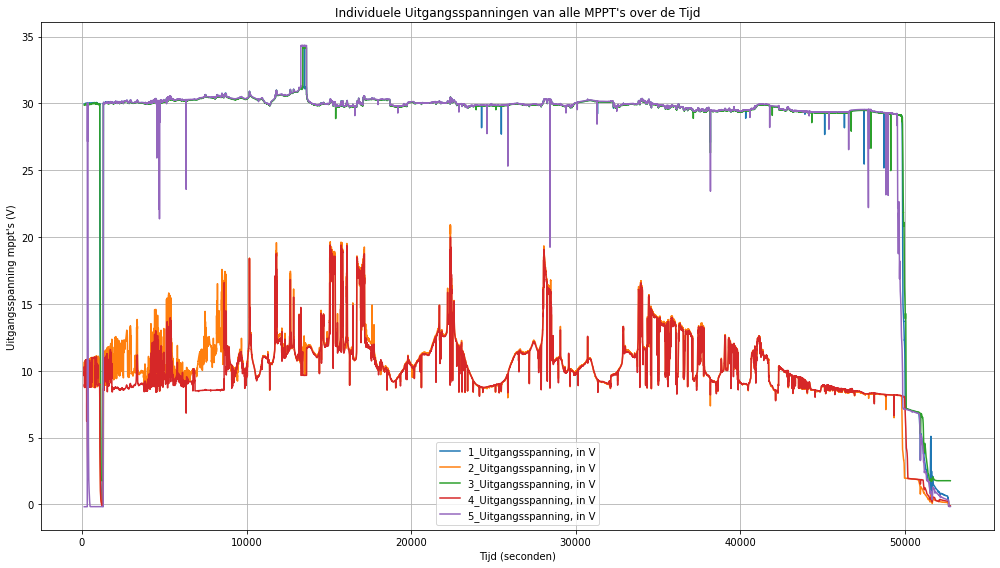

In [198]:
# Controleer of er uitgangsspanning-kolommen zijn gevonden en dat 'Total_Seconds' bestaat
if output_voltage_cols and '1_Dataloggertijd, in s' in merged_df1.columns:
    plt.figure(figsize=(14, 8))
    
    for col in output_voltage_cols:
        plt.plot(merged_df1['1_Dataloggertijd, in s'], merged_df1[col], label=col)
    
    plt.title('Individuele Uitgangsspanningen van alle MPPT\'s over de Tijd')
    plt.xlabel('Tijd (seconden)')
    plt.ylabel('Uitgangsspanning mppt\'s (V)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    #plt.ylim(0,100)
    plt.show()
else:
    print("Uitgangsspanning-kolommen of 'Total_Seconds' ontbreken. Controleer de data.")

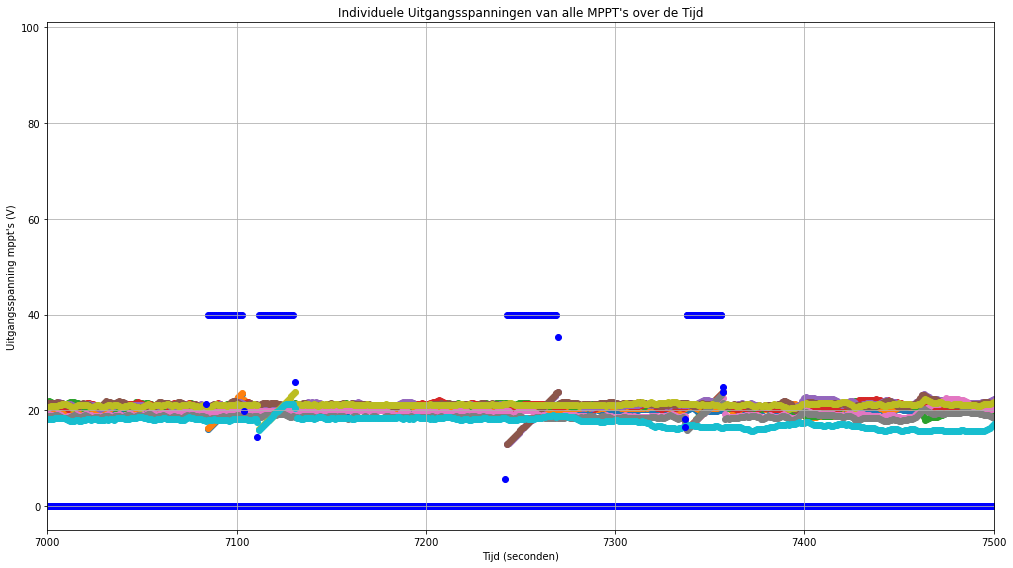

In [199]:
# Controleer of er uitgangsspanning-kolommen zijn gevonden en dat 'Total_Seconds' bestaat
if output_voltage_cols and '1_Dataloggertijd, in s' in merged_df1.columns:
    plt.figure(figsize=(14, 8))
    for col in voltage_cols:
        plt.scatter(merged_df1['1_Dataloggertijd, in s'], merged_df1[col], label=col)
    for i in range(1,int(len(voltage_cols)/2+1)):
        plt.scatter(merged_df1['1_Dataloggertijd, in s'], merged_df1[f'{i}_Algoritme mode (kan per software generatie verschillend zijn)']*20,c='Blue',label=f'{i}_Algoritme mode (kan per software generatie verschillend zijn)')
    plt.title('Individuele Uitgangsspanningen van alle MPPT\'s over de Tijd')
    plt.xlabel('Tijd (seconden)')
    plt.ylabel('Uitgangsspanning mppt\'s (V)')
    #plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.xlim(7000,7500)
    #plt.ylim(0,100)
    plt.show()
else:
    print("Uitgangsspanning-kolommen of 'Total_Seconds' ontbreken. Controleer de data.")

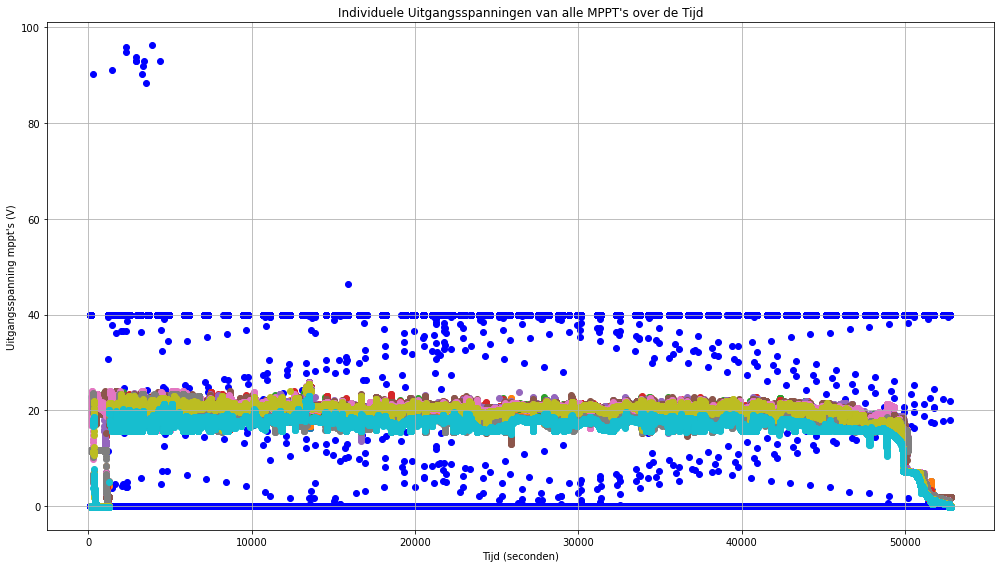

In [201]:
# Controleer of er uitgangsspanning-kolommen zijn gevonden en dat 'Total_Seconds' bestaat
if output_voltage_cols and '1_Dataloggertijd, in s' in merged_df1.columns:
    plt.figure(figsize=(14, 8))
    for i in range(1,int(len(voltage_cols)/2+1)):
        plt.scatter(merged_df1['1_Dataloggertijd, in s'], merged_df1[f'{i}_Algoritme mode (kan per software generatie verschillend zijn)']*20,c='Blue',label=f'{i}_Algoritme mode (kan per software generatie verschillend zijn)')
    for col in voltage_cols:
        plt.scatter(merged_df1_zonder_sweeps['1_Dataloggertijd, in s'], merged_df1_zonder_sweeps[col], label=col)
    plt.title('Individuele Uitgangsspanningen van alle MPPT\'s over de Tijd')
    plt.xlabel('Tijd (seconden)')
    plt.ylabel('Uitgangsspanning mppt\'s (V)')
    #plt.legend()
    plt.grid(True)
    plt.tight_layout()
    #plt.xlim(7000,7500)
    #plt.ylim(0,100)
    plt.show()
else:
    print("Uitgangsspanning-kolommen of 'Total_Seconds' ontbreken. Controleer de data.")

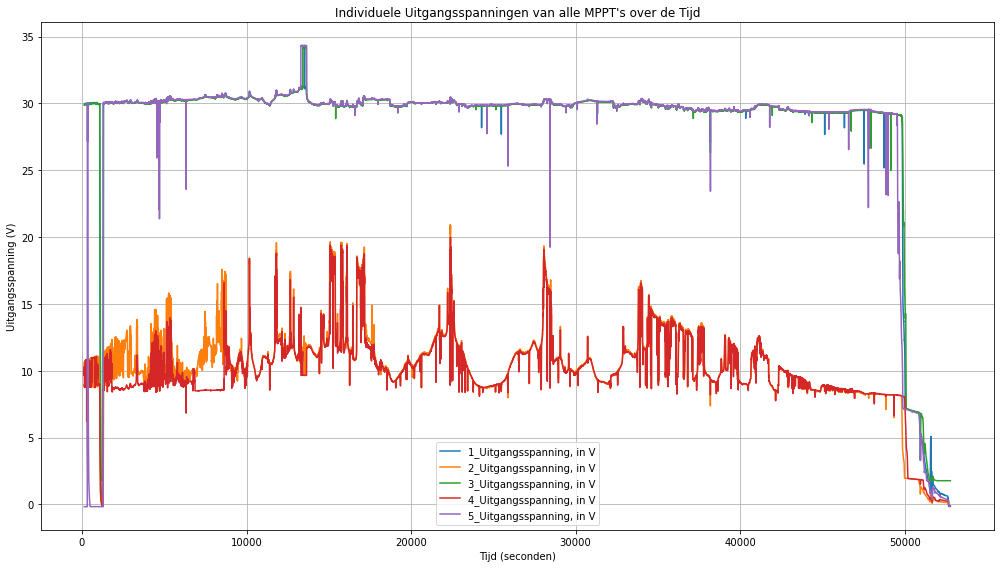

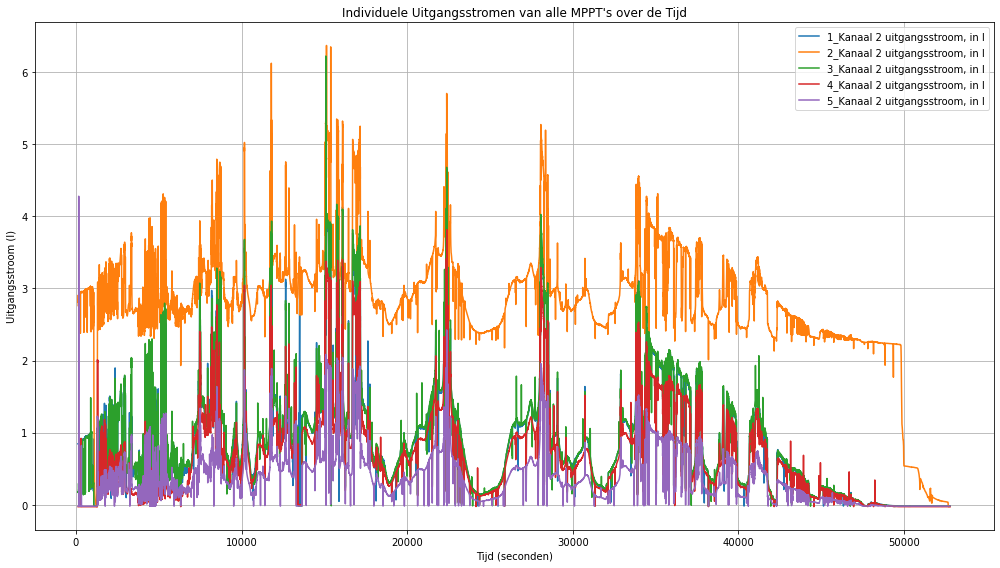

In [66]:
# Controleer of uitgangsspanning- en uitgangsstroom-kolommen aanwezig zijn
if output_voltage_cols and output_current_cols:
    # Plot de uitgangsspanning voor elke MPPT
    plt.figure(figsize=(14, 8))
    for col in output_voltage_cols:
        plt.plot(merged_df1['1_Dataloggertijd, in s'], merged_df1[col], label=col)
    plt.title('Individuele Uitgangsspanningen van alle MPPT\'s over de Tijd')
    plt.xlabel('Tijd (seconden)')
    plt.ylabel('Uitgangsspanning (V)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Plot de uitgangsstroom voor elke MPPT
    plt.figure(figsize=(14, 8))
    for col in output_current_cols:
        plt.plot(merged_df1['1_Dataloggertijd, in s'], merged_df1[col], label=col)
    plt.title('Individuele Uitgangsstromen van alle MPPT\'s over de Tijd')
    plt.xlabel('Tijd (seconden)')
    plt.ylabel('Uitgangsstroom (I)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Uitgangsspanning- of uitgangsstroom-kolommen ontbreken. Controleer de data.")


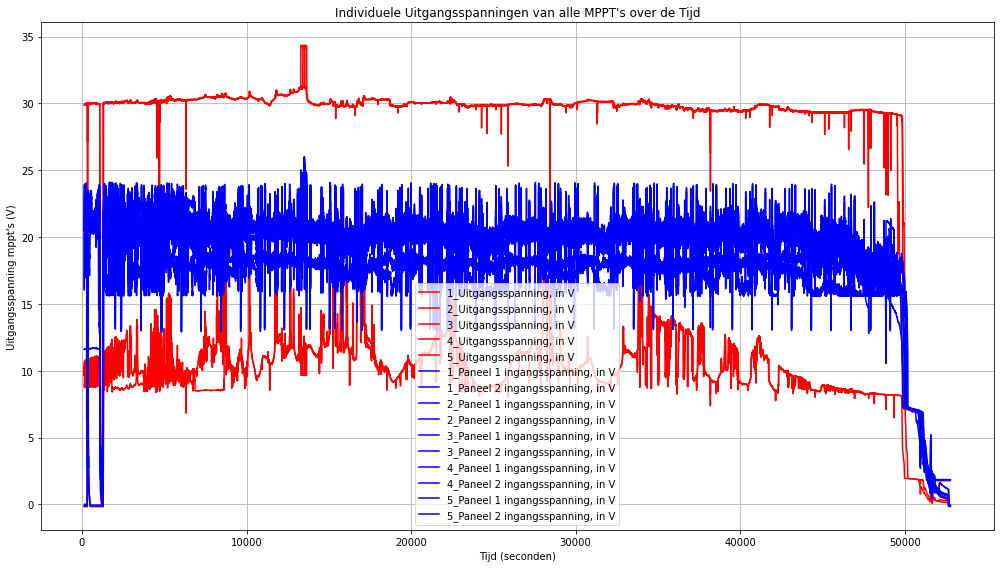

In [37]:
# Controleer of er uitgangsspanning-kolommen zijn gevonden en dat 'Total_Seconds' bestaat
if output_voltage_cols and '1_Dataloggertijd, in s' in merged_df1.columns:
    plt.figure(figsize=(14, 8))
    
    for col in output_voltage_cols:
        plt.plot(merged_df1['1_Dataloggertijd, in s'], merged_df1[col], label=col,c='Red')
    for col in voltage_cols:
        plt.plot(merged_df1['1_Dataloggertijd, in s'], merged_df1[col], label=col,c="blue")
    
    plt.title('Individuele Uitgangsspanningen van alle MPPT\'s over de Tijd')
    plt.xlabel('Tijd (seconden)')
    plt.ylabel('Uitgangsspanning mppt\'s (V)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    #plt.ylim(0,100)
    plt.show()
else:
    print("Uitgangsspanning-kolommen of 'Total_Seconds' ontbreken. Controleer de data.")

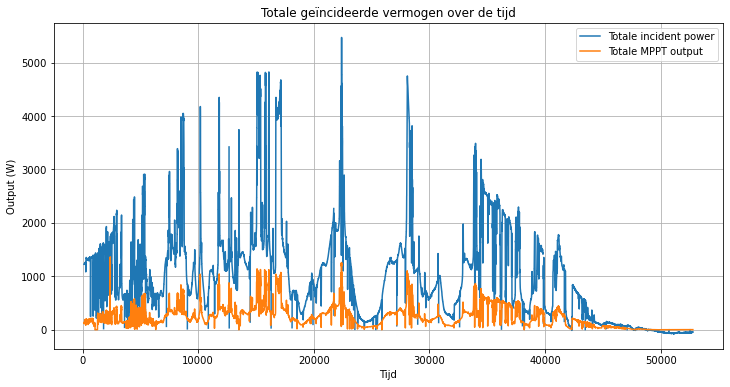

In [315]:
#plot totalinciden power
plt.figure(figsize=(12, 6))
plt.plot(merged_df1['1_Dataloggertijd, in s'], merged_df1['Totale_Incident_Power_W'], label='Totale incident power')
plt.plot(merged_df1['1_Dataloggertijd, in s'], merged_df1['Totale_MPPT_Output_W'], label='Totale MPPT output')
plt.title('Totale geïncideerde vermogen over de tijd')
plt.xlabel('Tijd')
plt.ylabel('Output (W)')
plt.legend()
plt.grid(True)
plt.show()

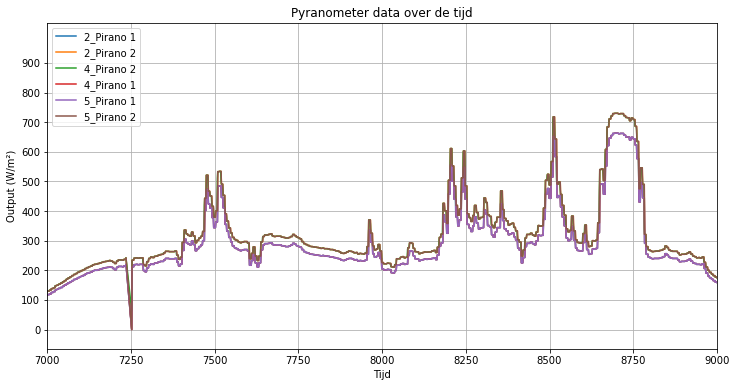

In [320]:
#filter prirano meter hoger dan 2000 eruit
merged_df1 = merged_df1[merged_df1['Totale_Incident_Power_W'] < 10000]

#plot de verschillende gevonden pyranometer kolommen tov van de tijd
plt.figure(figsize=(12, 6))
for col in pirano1_cols:
    
    plt.plot(merged_df1['1_Dataloggertijd, in s'], merged_df1[col], label=col)
    plt.title('Pyranometer data over de tijd')
    plt.xlabel('Tijd')
    plt.ylabel('Output (W/m²)')
    plt.xlim(7000, 9000)
    plt.legend()
    plt.yticks(np.arange(0, 1000, 100))
    plt.grid(True)
plt.show()

In [211]:
merged_df1 = merged_df1_zonder_sweeps.copy()

In [212]:
merged_df1['Efficiëntie_perc'] = (
    merged_df1['Totale_MPPT_Output_W'] / merged_df1['Totale_Incident_Power_W']
) * 100

# Verwijder eventuele NaN-waarden
merged_df1.dropna(subset=['Efficiëntie_perc'], inplace=True)

In [213]:
#filter snelheden boven de 100km/u eruit
#merged_df1 = merged_df1[merged_df1['1_Gps-snelheid, in km/u'] < 100]
#en effcienties boven de 200%
merged_df1 = merged_df1[merged_df1['Efficiëntie_perc'] < 100]
merged_df1 = merged_df1[merged_df1['Efficiëntie_perc'] > -100]
#filter eruit als de priano meter onder de 0 is
merged_df1 = merged_df1[merged_df1['Totale_Incident_Power_W'] > 0]

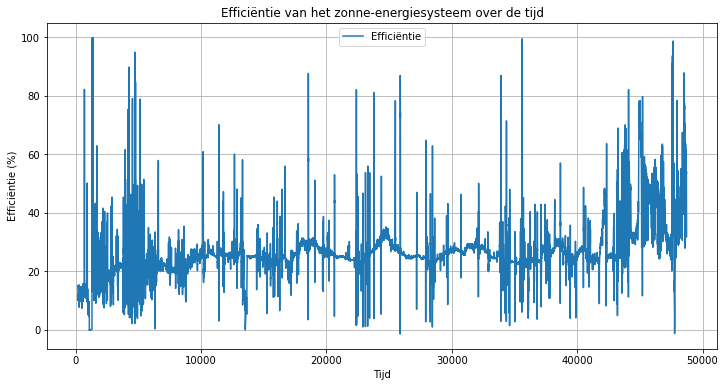

In [214]:
# Efficiëntie over de tijd plotten
plt.figure(figsize=(12, 6))
plt.plot(merged_df1['1_Dataloggertijd, in s'], merged_df1['Efficiëntie_perc'], label='Efficiëntie')
plt.title('Efficiëntie van het zonne-energiesysteem over de tijd')
plt.xlabel('Tijd')
plt.ylabel('Efficiëntie (%)')
plt.legend()
plt.grid(True)
plt.show()

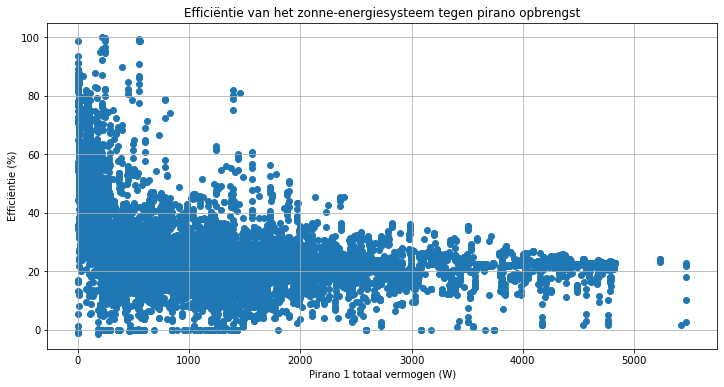

In [215]:
#plot efficiëntie tegen pirano opbrengst
plt.figure(figsize=(12, 6))

plt.scatter(merged_df1['Totale_Incident_Power_W'], merged_df1['Efficiëntie_perc'])
plt.title('Efficiëntie van het zonne-energiesysteem tegen pirano opbrengst')
plt.xlabel('Pirano 1 totaal vermogen (W)')
plt.ylabel('Efficiëntie (%)')
plt.grid(True)

plt.show()

Plot 1: Tijd 158.0020637254902 - 2158.00206372549 seconden, Aantal gegevenspunten: 1804
Plot 2: Tijd 2158.00206372549 - 4158.00206372549 seconden, Aantal gegevenspunten: 1765
Plot 3: Tijd 4158.00206372549 - 6158.00206372549 seconden, Aantal gegevenspunten: 1626
Plot 4: Tijd 6158.00206372549 - 8158.00206372549 seconden, Aantal gegevenspunten: 1894
Plot 5: Tijd 8158.00206372549 - 10158.00206372549 seconden, Aantal gegevenspunten: 1788
Plot 6: Tijd 10158.00206372549 - 12158.00206372549 seconden, Aantal gegevenspunten: 1793
Plot 7: Tijd 12158.00206372549 - 14158.00206372549 seconden, Aantal gegevenspunten: 1777
Plot 8: Tijd 14158.00206372549 - 16158.00206372549 seconden, Aantal gegevenspunten: 1773
Plot 9: Tijd 16158.00206372549 - 18158.00206372549 seconden, Aantal gegevenspunten: 1789
Plot 10: Tijd 18158.00206372549 - 20158.00206372549 seconden, Aantal gegevenspunten: 1799
Plot 11: Tijd 20158.00206372549 - 22158.00206372549 seconden, Aantal gegevenspunten: 1633
Plot 12: Tijd 22158.0020637

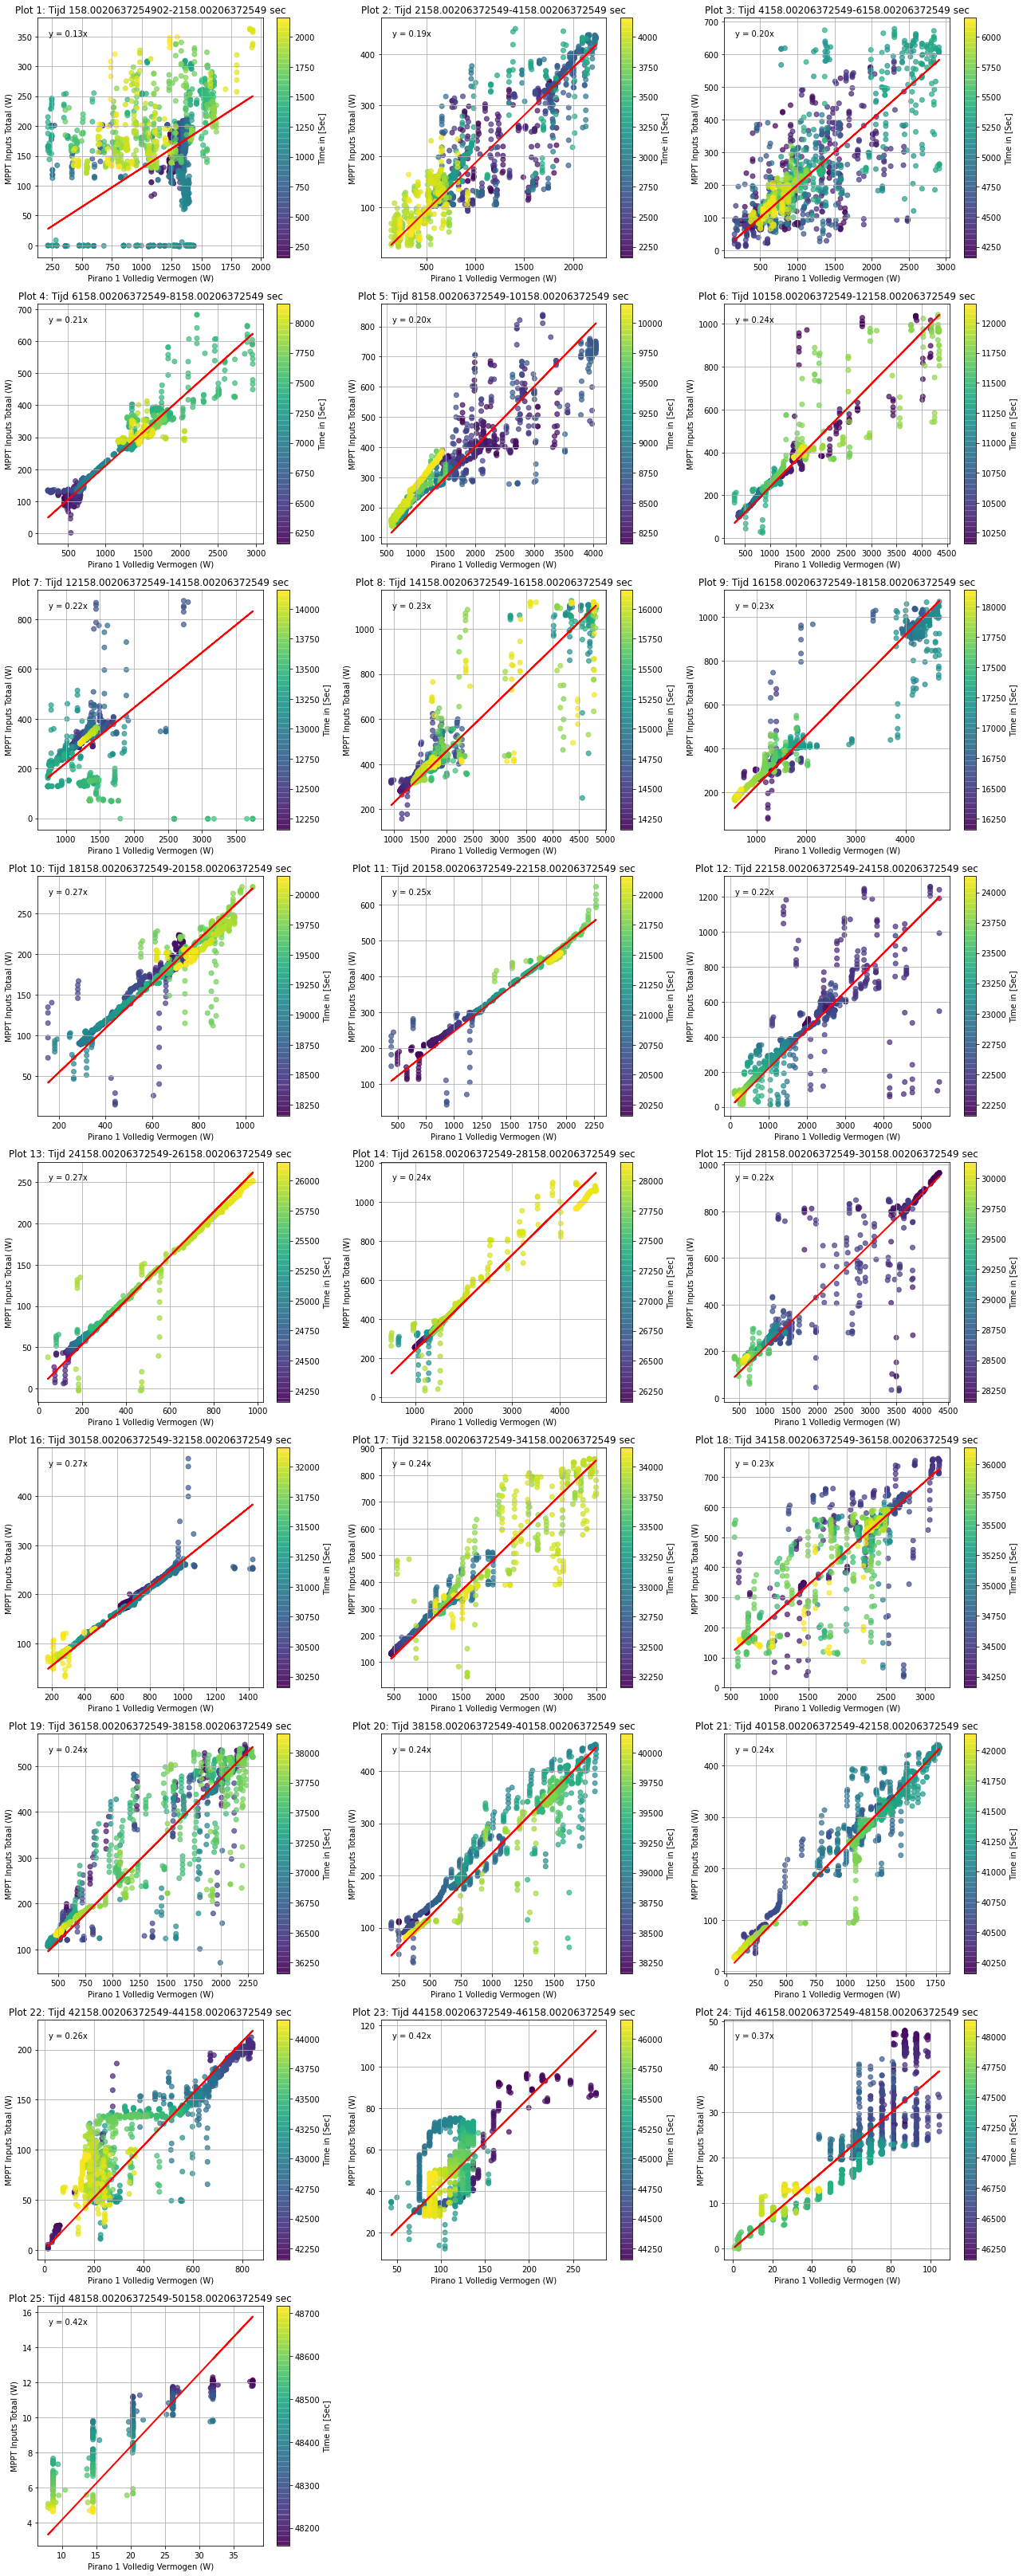

In [231]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

def plot_filtered_trendline_subplots(df, time_col, incident_power_col, mppt_output_col, interval_sec=1000, cols=3):
    """
    Plot meerdere scatter plots van incident power vs. MPPT output power met trendlijnen,
    gefilterd op een gegeven tijdsinterval, georganiseerd in subplots met een specifiek aantal kolommen.
    
    Parameters:
    - df: Pandas DataFrame
    - time_col: Kolomnaam voor de tijd in seconden
    - incident_power_col: Kolomnaam voor de totale incident power (W)
    - mppt_output_col: Kolomnaam voor de totale MPPT output power (W)
    - interval_sec: Interval in seconden voor het filteren van gegevens
    - cols: Aantal kolommen in de subplot grid
    """
    N = interval_sec
    # Zorg ervoor dat de tijdskolom numeriek is
    df[time_col] = pd.to_numeric(df[time_col], errors='coerce').copy()
    
    # Bepaal het minimum en maximum tijd
    min_time = df[time_col].min()
    max_time = df[time_col].max()
    
    # Bepaal het aantal intervallen
    num_intervals = int(math.ceil((max_time - min_time) / N))
    
    # Bepaal het aantal rijen op basis van het aantal kolommen
    rows = math.ceil(num_intervals / cols)
    
    # Maak subplots aan
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 5), squeeze=False)
    axes = axes.flatten()  # Maak de array 1D voor eenvoudige iteratie
    
    for i in range(num_intervals):
        start = min_time + i * N
        end = start + N
        window_df = df[(df[time_col] >= start) & (df[time_col] < end)].copy()
        
        ax = axes[i]
        
        print(f"Plot {i+1}: Tijd {start} - {end} seconden, Aantal gegevenspunten: {len(window_df)}")
        
        if not window_df.empty:
            # Scatter plot
            scatter = ax.scatter(
                window_df[incident_power_col],
                window_df[mppt_output_col],
                c=window_df[time_col],
                cmap='viridis',
                alpha=0.7
            )
            
            # Bereken de trendlijn door (0,0)
            # We willen y = slope * x, dus intercept = 0
            # Slope = sum(x * y) / sum(x^2)
            x = window_df[incident_power_col].values
            y = window_df[mppt_output_col].values
            mask = (~np.isnan(x)) & (~np.isnan(y)) & (x != 0)
            x_clean = x[mask]
            y_clean = y[mask]
            
            if len(x_clean) > 0 and np.sum(x_clean**2) != 0:
                slope = np.sum(x_clean * y_clean) / np.sum(x_clean**2)
                trendline = slope * x_clean
                ax.plot(x_clean, trendline, color='red', linewidth=2)
                
                # Voeg de trendlijn formule toe als annotatie
                formula = f'y = {slope:.2f}x'
                ax.text(0.05, 0.95, formula, transform=ax.transAxes, fontsize=10, verticalalignment='top')
            else:
                print(f"Niet genoeg gegevens voor een trendlijn in Plot {i+1}.")
            
            # Voeg een kleurstaaf toe aan de subplot
            cbar = fig.colorbar(scatter, ax=ax)
            cbar.set_label('Time in [Sec]')
            
            # Voeg titels en labels toe
            ax.set_title(f'Plot {i+1}: Tijd {start}-{end} sec')
            ax.set_xlabel('Pirano 1 Volledig Vermogen (W)')
            ax.set_ylabel('MPPT Inputs Totaal (W)')
            ax.grid(True)
        else:
            ax.set_visible(False)  # Verberg lege subplots
            print(f"Geen gegevenspunten voor Plot {i+1} in tijdsinterval {start} - {end} seconden.")
    
    # Verwijder lege subplots
    for j in range(num_intervals, rows * cols):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

# Gebruik de aangepaste functie
plot_filtered_trendline_subplots(
    df=merged_df1,
    time_col='1_Dataloggertijd, in s',
    incident_power_col='Totale_Incident_Power_W',
    mppt_output_col='Totale_MPPT_Output_W',
    interval_sec=2000,  # Pas dit aan naar wens
    cols=3  # Aantal kolommen in de subplot grid
)


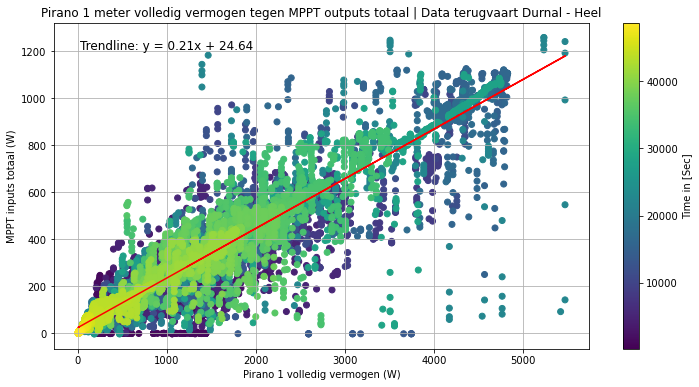

In [208]:
import matplotlib.pyplot as plt
import numpy as np

# Plot prirano meter tegen mppt outputs totaal
plt.figure(figsize=(12, 6))
plt.scatter(merged_df1['Totale_Incident_Power_W'], merged_df1['Totale_MPPT_Output_W'], label='Data points',c=merged_df1['1_Dataloggertijd, in s'])

# Calculate the linear trendline
slope, intercept = np.polyfit(merged_df1['Totale_Incident_Power_W'], merged_df1['Totale_MPPT_Output_W'], 1)
trendline = slope * merged_df1['Totale_Incident_Power_W'] + intercept

# Plot the trendline
plt.plot(merged_df1['Totale_Incident_Power_W'], trendline, color='red', label='Trendline')

# Add titles and labels
plt.title('Pirano 1 meter volledig vermogen tegen MPPT outputs totaal | Data terugvaart Durnal - Heel')
plt.xlabel('Pirano 1 volledig vermogen (W)')
plt.ylabel('MPPT inputs totaal (W)')
#plt.legend()
plt.grid(True)
#plt.colorbar()
#add colorbar name and label as time in s
plt.colorbar().set_label('Time in [Sec]')

# Add the trendline formula as text annotation
formula = f'Trendline: y = {slope:.2f}x + {intercept:.2f}'
plt.text(0.05, 0.95, formula, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.show()

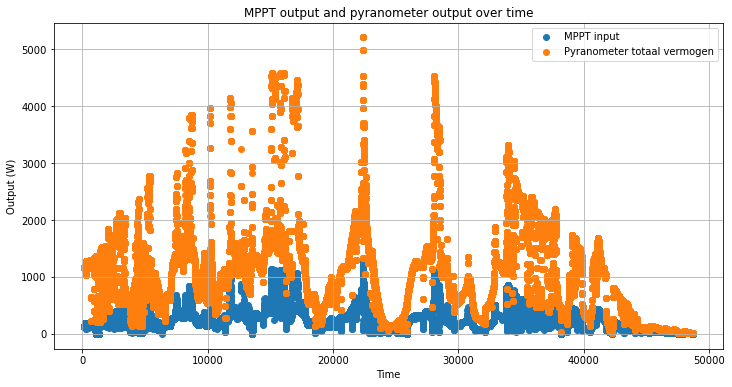

In [289]:
# Plot the MPPT output and pyranometer output over time
plt.figure(figsize=(12, 6))
plt.scatter(merged_df1['1_Dataloggertijd, in s'], merged_df1['Totale_MPPT_Output_W'], label='MPPT input')
plt.scatter(merged_df1['1_Dataloggertijd, in s'], merged_df1['Totale_Incident_Power_W'], label='Pyranometer totaal vermogen')
plt.title('MPPT output and pyranometer output over time')
plt.xlabel('Time')
plt.ylabel('Output (W)')
#plt.ylim(0,2000)  # Set y-axis limits correctly
plt.legend()
plt.grid(True)
plt.show()
